# COGS 118A- Project Checkpoint

# Names

- Satomi Ito
- Pudan Xu 
- Joakim Nguyen
- Wilson Tan
- Boyong Liu

# Abstract 

Manually labeling data is a tedious task. It requires human involvement and could require hundreds to thousands of hours with large enough datasets. By introducing automation, it frees up resources and could allow for more efficient use of time and energy. In this project, our goal is to utlize EEG data that was gained from sleeping and napping to automate kcomplex and spindle labeling to solve the manual labeling issue. The dataset comes from OSFHOME. We will utilize collected data from thirty brains and apply them to Machine Learning algorithms that we learned in class. Data from this dataset will be cleaned by taking EEG wavelengths and separating out the kcomplexes, spindles, and neither. Using this cleaned and labeled data, we can train our model to classify these three classes.


# Background

This study consists of thirty brains and over hundred thousands of data. Before we dive into the technicals of predicting the k complex and swindle, we need to understand how the mind works when people go to sleep. There are four stages of sleep. When a person goes to sleep, bursts of neural oscillatory activity happens, which is the pattern of neural activityin the central nervous system. Stages 1 to 3 are called non-rapid eye movement (NREM) sleep, also known as quiet sleep. Stage 4 is rapid eye movement (REM) sleep, also known as active sleep or paradoxical sleep <a name="stage"></a>[<sup>[1]</sup>](#stages).

In order to better analyze the brain activity in sleep, scientists use electroencephalogram (EEG), a non-invasive test that records brain activity. There are 2 hallmarks of non-rapid eye movement (NREM) - 2 sleep stage: the large multicomponent K-complex (KC) and the rhythmic spindle. Both of them can be seen on electroencephalography (EEG) <a name="fron"></a>[<sup>[2]</sup>](#front).

According to a clinical psychologist, John Cline, “K complexes are large waves that stand out from the background and often occur in response to environmental stimuli such as sounds in the bedroom. Sleep spindles are brief bursts of fast activity that appear something like the shape of an "eye" as they rapidly increase in amplitude and then rapidly decay.” <a name="psy"></a>[<sup>[3]</sup>](#psych)

In our project, we will use supervised machine learning model to classify and automate K-complex and sleep spindle.

# Problem Statement
We want to be able to automate k complexes and swindles so that researchers don't have to do it manually. We are getting the data from OSFHOME. The datasets have been already cleaned. As long as we have the labels and neccessary datas we can make a fair assumption on the k complexes and swinds from the participants that the dataset have measurered. 



# Data




In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

In [2]:
kcomplex = np.load(os.getcwd() + '/epoch_data/kcomplex.npy')
non_kcomplex = np.load(os.getcwd() + '/epoch_data/non_kcomplex.npy')

spind = np.load(os.getcwd() + '/epoch_data/spind.npy')
non_spind = np.load(os.getcwd() + '/epoch_data/non_spind.npy')

In [3]:
# DataFrame for kcomplexes to be labeled '1'
# dimension of epochs by voltage_samples
pd.DataFrame(kcomplex[:,0,:]).head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,4.415367e-06,4.752551e-06,0.000004,0.000004,0.000002,4.707083e-08,-0.000002,-0.000005,-0.000008,-0.000010,...,-1.780537e-05,-2.264944e-05,-2.586942e-05,-0.000028,-0.000028,-0.000028,-0.000028,-2.669207e-05,-0.000025,-0.000022
1,1.726092e-06,4.698175e-07,-0.000002,-0.000004,-0.000006,-8.086774e-06,-0.000009,-0.000009,-0.000008,-0.000008,...,-7.042471e-07,-4.638679e-08,5.499838e-07,0.000001,0.000003,0.000005,0.000008,1.185227e-05,0.000015,0.000018
2,8.762547e-07,1.170187e-06,0.000002,0.000002,0.000003,3.477416e-06,0.000004,0.000004,0.000004,0.000004,...,4.500991e-06,5.780507e-06,6.857185e-06,0.000007,0.000007,0.000005,0.000003,5.567314e-07,-0.000002,-0.000004
3,1.746903e-05,1.882448e-05,0.000021,0.000023,0.000024,2.510682e-05,0.000026,0.000026,0.000024,0.000022,...,-4.033973e-06,-1.355419e-06,1.213314e-06,0.000004,0.000006,0.000007,0.000008,8.792695e-06,0.000008,0.000007
4,-2.124603e-05,-1.812469e-05,-0.000013,-0.000009,-0.000006,-5.863742e-06,-0.000007,-0.000010,-0.000012,-0.000015,...,-1.343765e-06,-2.197581e-06,-4.090898e-06,-0.000007,-0.000011,-0.000016,-0.000019,-2.098042e-05,-0.000021,-0.000019


In [4]:
# DataFrame for non-kcomplexes to be labeled '0'
# dimension of epochs by voltage_samples
pd.DataFrame(non_kcomplex[:,0,:]).head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.566427e-06,-1.449023e-06,-1.283630e-06,-1.345245e-06,-1.655413e-06,-2.095007e-06,-2.382864e-06,-0.000002,-1.562451e-06,-3.540142e-07,...,-6.958051e-07,2.967973e-07,0.000001,0.000002,0.000002,1.131968e-06,3.565156e-07,-4.673293e-07,-1.097432e-06,-1.428832e-06
1,3.426198e-06,3.399903e-06,2.926554e-06,2.029759e-06,7.972347e-07,-4.950454e-07,-1.657046e-06,-0.000002,-2.675115e-06,-2.426760e-06,...,-8.331510e-07,-1.928302e-06,-0.000003,-0.000003,-0.000003,-2.366074e-06,-1.567543e-06,-8.127664e-07,-3.973447e-07,-2.971153e-07
2,3.736406e-07,-5.934976e-08,-8.119953e-07,-1.523690e-06,-2.171766e-06,-2.659642e-06,-2.909132e-06,-0.000003,-2.428050e-06,-1.707722e-06,...,1.668857e-06,1.936467e-06,0.000002,0.000002,0.000001,5.601539e-07,3.551606e-07,4.537293e-07,8.770107e-07,1.433513e-06
3,8.966670e-07,-8.911243e-09,-1.245307e-06,-1.645661e-06,-1.431852e-06,-5.959999e-07,3.200556e-07,0.000001,1.224840e-06,8.598033e-07,...,-2.708270e-06,-2.955879e-06,-0.000003,-0.000003,-0.000003,-2.875433e-06,-2.757854e-06,-2.682635e-06,-2.813821e-06,-3.053511e-06
4,-9.669624e-07,-8.128334e-07,-5.514599e-07,-4.549705e-07,-5.273432e-07,-7.628363e-07,-9.881963e-07,-0.000001,-8.800505e-07,-4.350858e-07,...,1.525206e-06,2.003325e-06,0.000002,0.000002,0.000001,-5.438583e-08,-1.154600e-06,-1.877739e-06,-1.894391e-06,-1.307222e-06


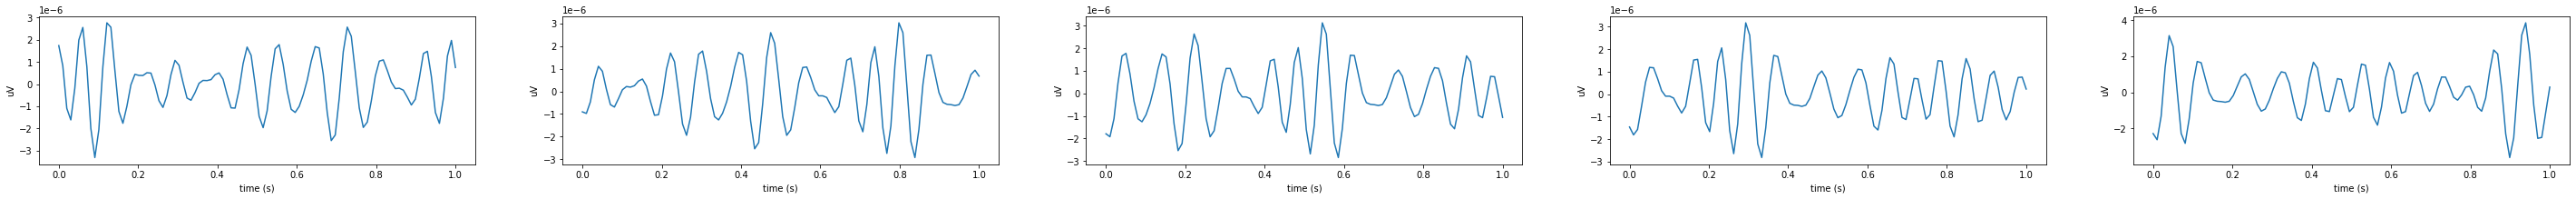

In [5]:
# Sample of 5 consecutive epochs for non-spindles
resample_size = 100
time_int = np.linspace(0,1,resample_size)
fig, axs = plt.subplots(1, 5, figsize=(50, 3))
for i in range(5):
    axs[i].plot(time_int, non_spind[i,0,:])
    axs[i].set_ylabel('uV')
    axs[i].set_xlabel('time (s)')

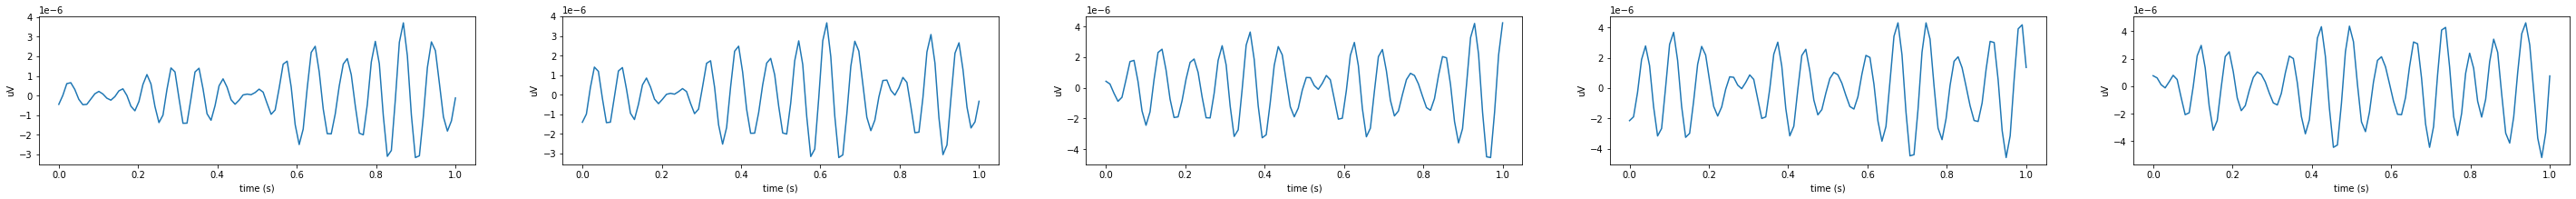

In [6]:
# Sample of 5 consecutive epochs for spindles
time_int = np.linspace(0,1,resample_size)
fig, axs = plt.subplots(1, 5, figsize=(50, 3))
for i in range(5):
    axs[i].plot(time_int, spind[i,0,:])
    axs[i].set_ylabel('uV')
    axs[i].set_xlabel('time (s)')

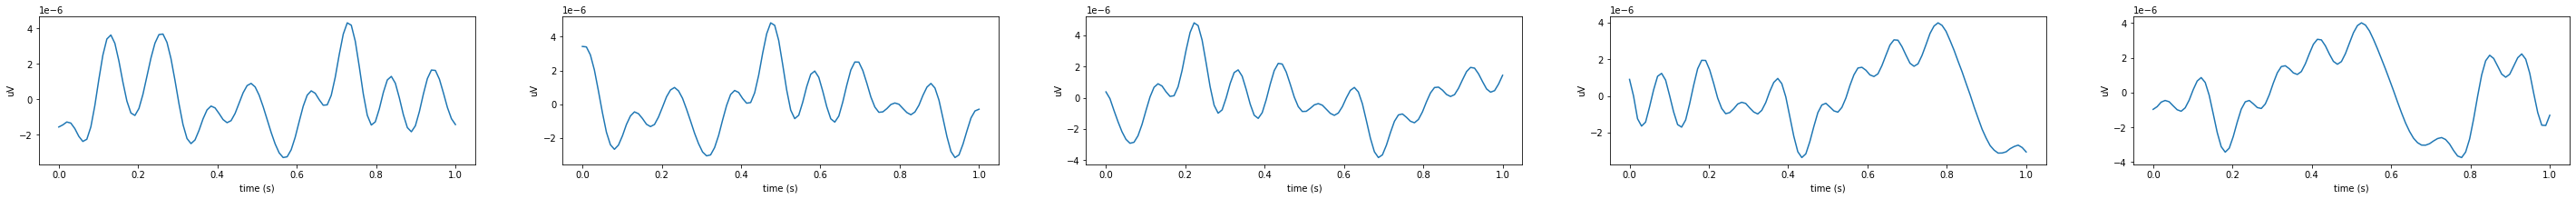

In [7]:
# Sample of 5 consecutive epochs for non-kcomplexes
time_int = np.linspace(0,1,resample_size)
fig, axs = plt.subplots(1, 5, figsize=(50, 3))
for i in range(5):
    axs[i].plot(time_int, non_kcomplex[i,0,:])
    axs[i].set_ylabel('uV')
    axs[i].set_xlabel('time (s)')

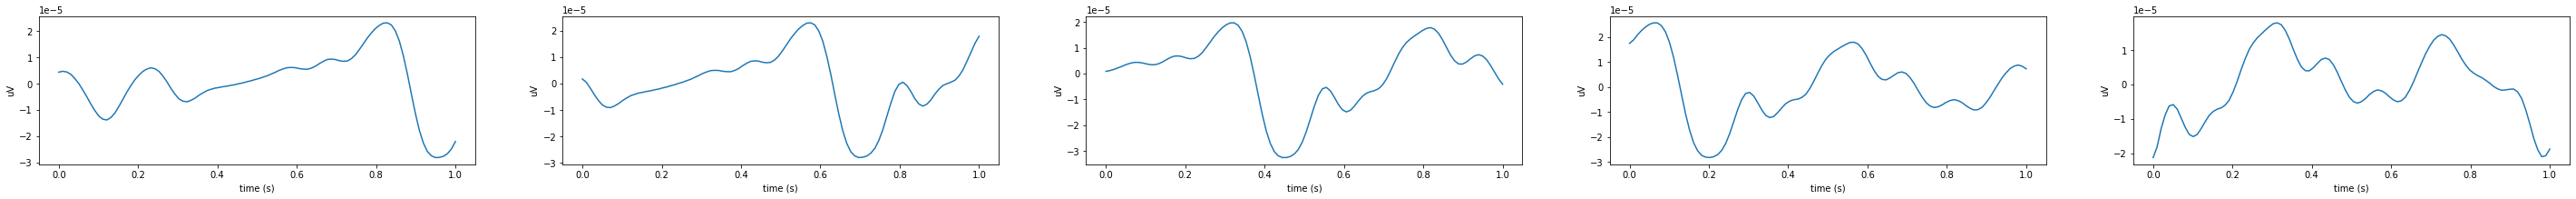

In [8]:
# Sample of 5 consecutive epochs for k-complexes
time_int = np.linspace(0,1,resample_size)
fig, axs = plt.subplots(1, 5, figsize=(50, 3))
for i in range(5):
    axs[i].plot(time_int, kcomplex[i,0,:])
    axs[i].set_ylabel('uV')
    axs[i].set_xlabel('time (s)')

In [9]:
# Creating k-NN baseline model
ones = np.ones(kcomplex.shape[0])
zeros = np.zeros(non_kcomplex.shape[0])

X = np.vstack((kcomplex[:,0,:], non_kcomplex[:,0,:]))
y = np.hstack((ones, zeros))

neigh = KNeighborsClassifier()
# Train on entire "mini"-dataset
neigh.fit(X, y)

KNeighborsClassifier()

In [10]:
# Model scoring on the training set of kcomplexes
neigh.score(kcomplex[:,0,:], ones)

0.10256410256410256

In [11]:
# Model predicting on the training set of non-kcomplexes
neigh.score(non_kcomplex[:,0,:], zeros)

0.9991368148467846

***WARNING***: The scoring accuracy is extremely bad for k-complexes and extremely good for non-kcomplexes because the training dataset. There are only 195 samples for k-complexes, but there are just under 7000 samples for non-kcomplexes.

# Proposed Solution
We are going to use K-means algorithm

# Evaluation Metrics

This project looks at binary classification, so, we can use the typical binary classification loss which is the proportion of data points labeled correctly. In this case it would be the proportion of K-complex and Spindles labeled correctly. This would simply be the number of images labeled correctly divided by the number of images. $$ e = \frac{1}{n}\sum_{i=1}^{n} 1(y_i \neq f(x_i; W)) $$
However, this loss has an infinite gradient when going from correct to incorrect decision and zero gradient everywhere else which makes it very hard to minimize. Therefore, it may be best to only use this as a baseline.

Another common classification metric would be to maximize the area under the ROC curve. By maximizing the area under the ROC curve. Because area under the curve corresponds to how good the model is, maximizing ROC-AUC could be another potential metric evaluation. We considered the ROC as a potential metric because it would give use the opportunity to visualize thresholds and the proportion of false negatives to false positives the model makes.

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters

Since we just changed the topic, we are still working on the dataset and discussing methods to use.



# Ethics & Privacy

The data used in this project come from human participants. However, this project doesn’t use any personally identifiable information nor does it require any further human participation. Also, the data used in the original EEG experiment involved informed consent and is permitted to be used non-commercially.

We did not label the data and are unable to determine whether the data was correctly labeled. One way that could help this issue would be to look at other examples of K-complexes and Spindles and compare to see whether they look similar to the corresponding labeled images. An issue with this is we would be slightly unconfident in identifying the correct labels for certain images due to a lack of expertise.

Because our data will be images, there is a worry about the “curse of dimensionality”. However, we’re confident that we will still be able to get good training sets because of the abundance of data available to counteract the lower proportional representation.

One issue arises from the fact that our model will not predict with 100 percent accuracy. If the model is used for K-complex and Spindle classification, the class prediction of an image would still need to be verified by a human. The problem arises when this verification is ignored and the prediction of the model is taken as absolutely correct. Not only could this impact the results of studies, but also the waste of resources that go into those studies. Some ways to counter this would be to run classification on the images with multiple models and use the majority classification across the models which could help make more accurate predictions. We could also be transparent about our results and inform users that the model isn’t perfect and the results require verification. In the worst case scenario we will recall the entire algorithm.

# Team Expectations 

* *Attend discussion meetings and reaching out to members to help each other out.*
* *Everyone must contribute.*
* *Meet at least once a week to keep track of progress and set goals*

# Project Timeline Proposal



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/20  |  4 PM |  Brainstorm topics/questions (all)  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 4/21  |  4 PM |  Do background research on topic  | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 4/24  | 4 PM  | Edit, finalize, and submit proposal; Search for datasets   | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 5/3  | 4 PM  | Wrangle Data | Review/Edit wrangling; |
| 5/10  | 4 PM  | Wrangle Data | Review/Edit wrangling; |
| 5/17  | 4 PM  | Wrangle Data  | Review/Edit wrangling; Discuss Analysis Plan |
| 5/19  | 6:30 PM  | Come up with a new topic | Decide on a topic/Look for data/Clean data; Discuss Analysis Plan |
| 5/20  | 4 PM  | Finalize wrangling/EDA; Begin programming for project  | Discuss/edit project code; Complete project |
| 5/24  | 4 PM  | Complete analysis; Draft results/conclusion/discussion | Discuss/edit full project |
| 6/7  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes

<a name="stage"></a>1.[^](#stages): The 4 Stages of Sleep. What's Happening During NREM and REM Sleep

https://www.verywellhealth.com/the-four-stages-of-sleep-2795920



<a name="fron"></a>2.[^](#front): The Emergence of Spindles and K-Complexes and the Role of the Dorsal Caudal Part of the Anterior Cingulate as the Generator of K-Complexes

https://www.frontiersin.org/articles/10.3389/fnins.2019.00814/full



<a name="psy"></a>3.[^](#psych): Sleep Spindles. Sleep spindles signal processes that refresh our memories.

https://www.psychologytoday.com/us/blog/sleepless-in-america/201104/sleep-spindles
